In [19]:
from langgraph.graph import StateGraph,START,END

In [20]:
from typing import List,Annotated,Dict,Tuple,Any,TypedDict

In [21]:
class BMIState(TypedDict):
    height: float
    weight : float
    bmi : float
    category:str #it can be anything

In [22]:
def compute_bmi(state:BMIState) -> BMIState:

    height = state["height"]
    weight = state["weight"]

    bmi = weight/(height**2)

    state["bmi"] = bmi
    return state

In [23]:
def label_bmi (state : BMIState) -> BMIState:
    bmi_state =state['bmi']
    if bmi_state <18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi_state <24.9:
        state["category"] = 'Normal'

    else:
        state['category'] = 'Overweight'

    return state

In [24]:
graph= StateGraph(BMIState)

# Define graph structure
#ADD THE NODE
graph.add_node('calculate_bmi',compute_bmi)
graph.add_node('label_bmi_node',label_bmi)
#ADD THE EDGES
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','label_bmi_node')
graph.add_edge('label_bmi_node',END)


In [25]:
#compile the graph
workflow=graph.compile()

In [26]:
intial_state={"height":1.75,"weight":70}

In [27]:
workflow.invoke({"height":1.75,"weight":70})

{'height': 1.75, 'weight': 70, 'bmi': 22.857142857142858, 'category': 'Normal'}

In [28]:
final_state=workflow.invoke({"height":1.75,"weight":70})

In [29]:
final_state

{'height': 1.75, 'weight': 70, 'bmi': 22.857142857142858, 'category': 'Normal'}

In [30]:
from IPython.display import display,Image

In [31]:
workflow.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'calculate_bmi': Node(id='calculate_bmi', name='calculate_bmi', data=calculate_bmi(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'label_bmi_node': Node(id='label_bmi_node', name='label_bmi_node', data=label_bmi_node(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='calculate_bmi', data=None, conditional=False), Edge(source='calculate_bmi', target='label_bmi_node', data=None, conditional=False), Edge(source='label_bmi_node', target='__end__', data=None, conditional=False)])

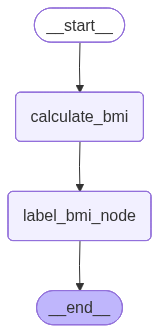

In [32]:
Image(workflow.get_graph().draw_mermaid_png())